<a href="https://colab.research.google.com/github/sskiran88k/Project_Regression/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Program

In [ ]:
print("Happy Programming")

Happy Programming


Pyhon Basics

Machine Learining Sample Code

62.35995479013815
2.6309457673224648


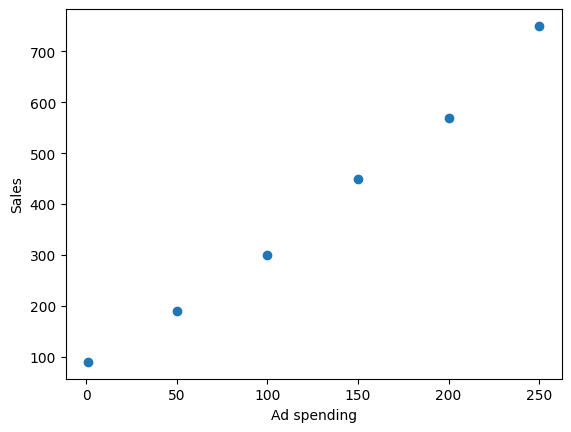

0.9915175615842509


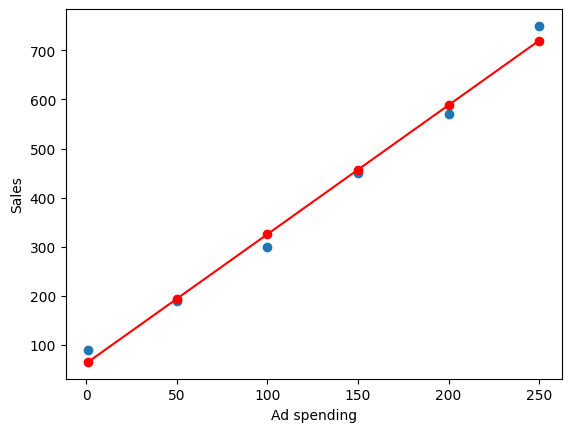

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#x=np.array([0,1,2,3,4,5,6,7,8,9])
#y=np.array([1,3,2,5,7,8,8,9,10,12])
x=np.array([1,50,100,150,200,250])
#y=np.array([2.4,18.4,33,46,60,80])
y=np.array([90,190,300,450,570,750])

#x=np.array([95,85,80,70,60])
#y=np.array([85,95,70,65,70])
n=np.size(x)
m_x,m_y=np.mean(x),np.mean(y)
ss_xy=np.sum(y*x)-n*m_x*m_y
ss_xx=np.sum(x*x)-n*m_x*m_x
b0_1=ss_xy/ss_xx
b0_0=m_y-b0_1*m_x
y_pred=b0_0+b0_1*x

print(b0_0)
print(b0_1)
plt.scatter(x,y)
plt.xlabel('Ad spending')
plt.ylabel('Sales')
plt.show()
plt.figure
plt.scatter(x,y)
plt.plot(x,y_pred, color='r',marker='o')
plt.xlabel('Ad spending')
plt.ylabel('Sales')
from sklearn.metrics import r2_score
r2=r2_score(y, y_pred)
print(r2)
plt.show()

Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Linear Regression Code

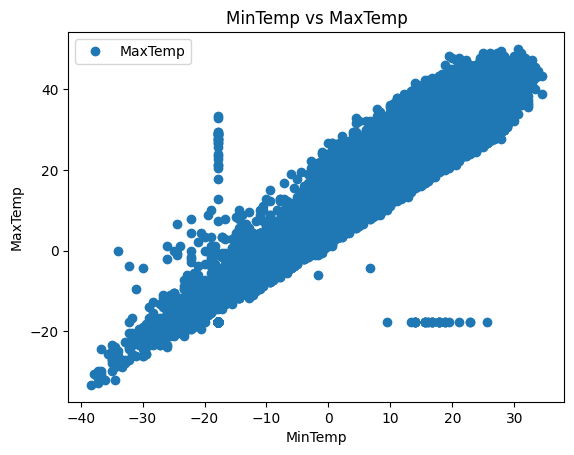

[10.66185201]
[[0.92033997]]
          Actual  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]


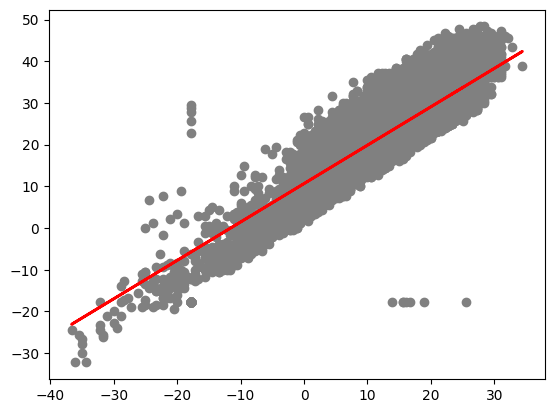

accuracy=0.767022


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan  3 00:11:22 2020

@author: lenovo
"""
#step1: identify and import libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#step2: load data into program
#%matplotlib inline
#dataset = pd.read_csv(r'C:\Users\lenovo\Desktop\Weather.csv')
dataset = pd.read_csv('/content/drive/MyDrive/ML Experiments/ml/ml/Weather.csv')
#dataset.shape
#dataset.describe()
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')       
plt.show()
#step3: data cleaning
#b = np.arange(10).reshape((-1,1))
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
# step4: divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# step 5: Apply the training data to algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_) #c
#For retrieving the slope:
print(regressor.coef_) #m
#MaxTemp=0.92033997*MinTemp+10.66185201;
#step 6: Test the trained model on testing data
y_pred = regressor.predict(X_test) #y=mx+c

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
# step7: Calculate the metrics
#print('slope=%f'%regressor.intercept_)
#print('intercept=%f'%regressor.coef_)
score=metrics.r2_score(y_test,y_pred)
print('accuracy=%f'%score)

Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     Actual  Predicted
512       1          1
457       0          0
439       0          0
298       0          0
37        0          0
..      ...        ...
213       1          1
519       0          0
432       1          1
516       1          1
500       0          0

[114 rows x 2 columns]
[[63  4]
 [ 2 45]]
Accuracy: 0.9473684210526315


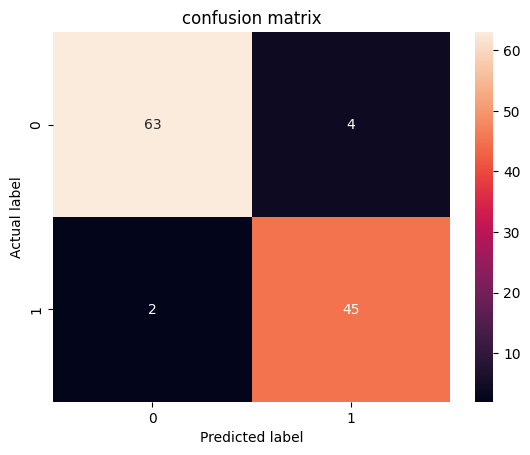

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 22 18:01:19 2021

@author: lenovo
"""
#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

data=pd.read_csv('/content/drive/MyDrive/ML Experiments/ml/ml/breast_cancer.csv')

data['diagnosis'].replace('M',1,inplace=True)
data['diagnosis'].replace('B',0,inplace=True)

df=data.drop(columns=['id'])

X=df.drop(columns=['diagnosis'])
#X= df.drop(columns=['diagnosis','Unnamed 32'])
y=df['diagnosis']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

conf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True)

plt.title('confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))


K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[169.    58.  ]
 [183.5   72.25]]


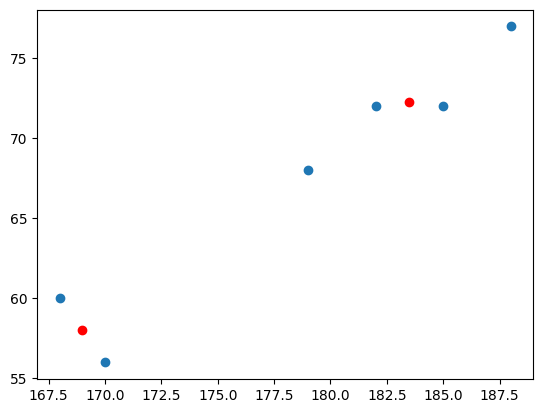

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  7 23:48:05 2020

@author: lenovo
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#data for n_clusters=3
#x=np.array([12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72])
#y=np.array([39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24])
x=np.array([185,170,168,179,182,188])
y=np.array([72,56,60,68,72,77])
df = np.array(list(zip(x, y)))
plt.scatter(x,y)
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)
centroids=kmeans.cluster_centers_
labels=kmeans.predict(df)
print(centroids)
plt.scatter(centroids[:,0],centroids[:,1],c='r')
plt.show()

K- Means Clustering 2D

itertion:1
c1=[179, 68],c2=[188, 77]
a:[[185  72]
 [188  77]],b:[[170  56]
 [168  60]
 [179  68]
 [182  72]]
itertion:2
c1=[186.5, 74.5],c2=[174.75, 64.0]
a:[[170  56]
 [168  60]
 [179  68]],b:[[185  72]
 [182  72]
 [188  77]]
itertion:3
c1=[172.33333333333334, 61.333333333333336],c2=[185.0, 73.66666666666667]
a:[[185  72]
 [179  68]
 [182  72]
 [188  77]],b:[[170  56]
 [168  60]]
itertion:4
c1=[183.5, 72.25],c2=[169.0, 58.0]
a:[[170  56]
 [168  60]],b:[[185  72]
 [179  68]
 [182  72]
 [188  77]]
itertion:5
c1=[169.0, 58.0],c2=[183.5, 72.25]
a:[[185  72]
 [179  68]
 [182  72]
 [188  77]],b:[[170  56]
 [168  60]]
itertion:6
c1=[183.5, 72.25],c2=[169.0, 58.0]
a:[[170  56]
 [168  60]],b:[[185  72]
 [179  68]
 [182  72]
 [188  77]]
itertion:7
c1=[169.0, 58.0],c2=[183.5, 72.25]
a:[[185  72]
 [179  68]
 [182  72]
 [188  77]],b:[[170  56]
 [168  60]]
itertion:8
c1=[183.5, 72.25],c2=[169.0, 58.0]
a:[[170  56]
 [168  60]],b:[[185  72]
 [179  68]
 [182  72]
 [188  77]]
itertion:9
c1=[169.0, 58.0

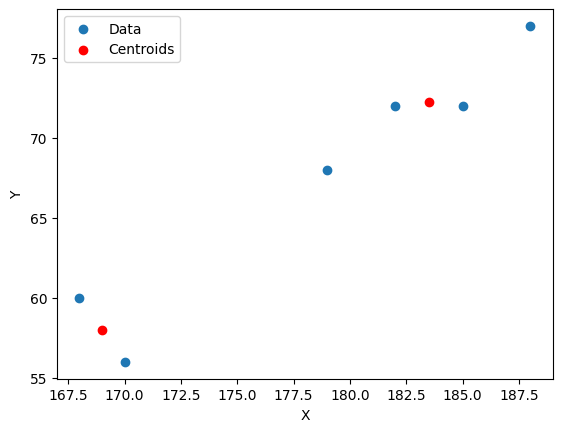

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 18 14:14:05 2021

@author: NIKESH
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x=np.array([185,170,168,179,182,188])
y=np.array([72,56,60,68,72,77])
np.random.seed(200)
s1=[]
s2=[]
s3=[]
s4=[]
def c_dist(x,y,c1,c2):# use the formulasqrt((x-c[0])**2+(y-c[1])**2)
    dist1=np.absolute(x-c1[0])+np.absolute(y-c1[1])
    dist2=np.absolute(x-c2[0])+np.absolute(y-c2[1])
    return dist1,dist2

def my_cluster(x,y,d1,d2):
    for i in range(0,len(x)):
        if d1[i]>=d2[i]:
            s1.append(x[i])
            s2.append(y[i])
        else:
            s3.append(x[i])
            s4.append(y[i])
    return s1,s2,s3,s4

c1=[x[3],y[3]]
c2=[x[5],y[5]]
j=1
a=np.array(list(zip(s1,s2)))
b=np.array(list(zip(s3,s4)))
c1_old=c2_old=[0,0]
while(j<10):
    print("itertion:{}".format(j))
    d1,d2=c_dist(x,y,c1,c2)
    print("c1={},c2={}".format(c1,c2))
    s1,s2,s3,s4=my_cluster(x,y,d1,d2)
    a=np.array(list(zip(s1,s2)))
    b=np.array(list(zip(s3,s4)))
    print("a:{},b:{}".format(a,b))
    c1_old=c1
    c2_old=c2
    c1=[np.mean(s1),np.mean(s2)]
    c2=[np.mean(s3),np.mean(s4)]
    s1.clear()
    s2.clear()
    s3.clear()
    s4.clear()
    j=j+1
else:
    print("clustering is completed")

plt.scatter(x,y)
plt.scatter(c1[0],c1[1],c='r')
plt.scatter(c2[0],c2[1],c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(["Data", "Centroids"], loc ="upper left")

CNN MNIST Classification

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/datasets/mnist.py'>
11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
28
28
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                          

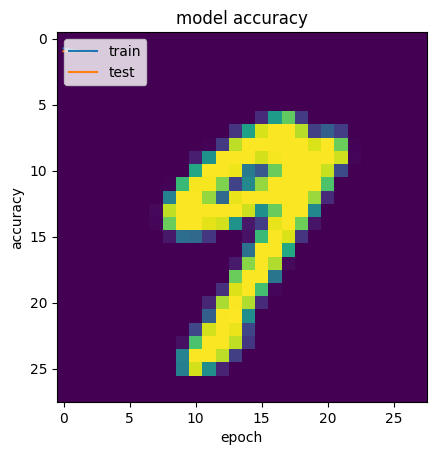

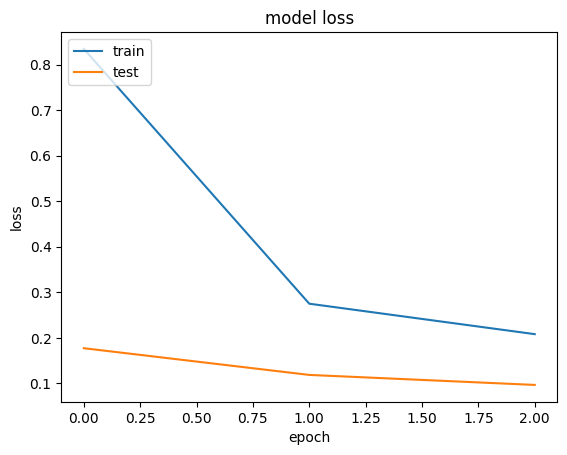

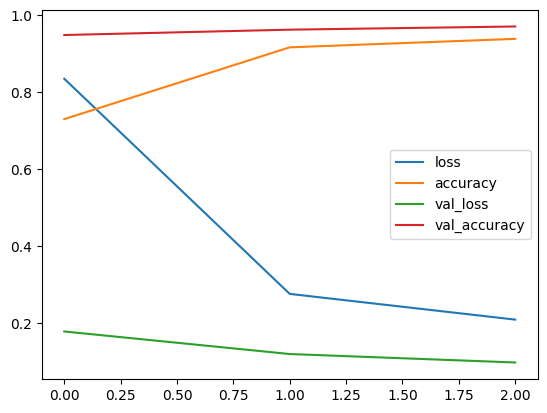

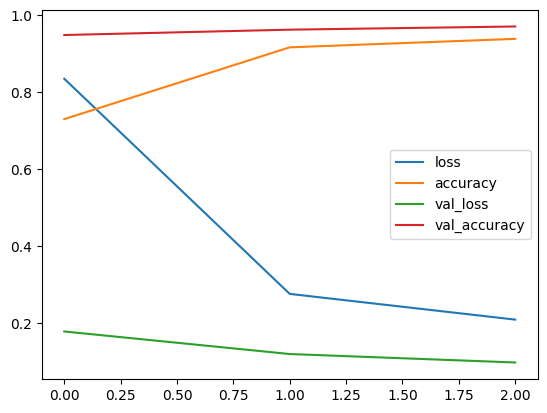

Test loss: 0.09653070569038391
Test accuracy: 0.9704999923706055


Test loss: 0.09653070569038391
Test accuracy: 0.9704999923706055
1/1 [==============================] - 0s 112ms/step


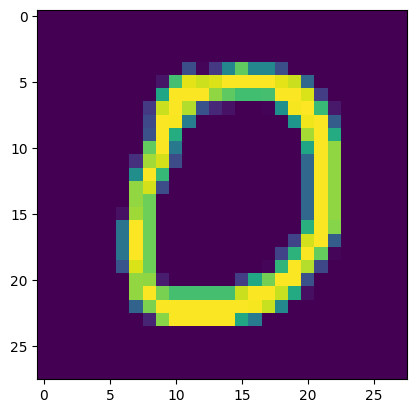

In [6]:
# -*- coding: utf-8 -*-
"""CNN_MNIST_classification.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1a4j-yWsaxvjEcih6Hs_EodGPc89W-Ir4

The mnist dataset is loaded from the library keras.datasets. Since the data set consists of training data and testing data seperately these are copied into different variables. Regarding the training the features are copied into x_train and labels are copied into y_train. Similarly, the testing features are copied into x_test and labels are copied into y_test.
"""



from keras.datasets import mnist
print(mnist)

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_test1=x_test



"""Checking the data set size. X_train and x_test consists of 60000 and 10000 samples of 28x28 array respectively. The y_train and y_test consists of 60000 and 10000 sample values."""

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

"""Visualizing the sample of the input using matplotlib. The 28x28 array is displayed as an image as shoen in the figure. This is done using 'plt.imshow()' function."""

import matplotlib.pyplot as plt
plt.imshow(x_test[20])

"""Copying the row and column sizes of the input array into the variables 'input_img_row' and 'input_img_col' respectively."""

#obtain input image row and column lenghts
input_img_row=x_train[0].shape[0]
input_img_col=x_train[0].shape[1]
print(input_img_row)
print(input_img_col)

"""The input for the CNN requires the four dimensional data but the input is three dimensional only. Therefoere the inputs are converted to 4D-arrays using 'reshape()' function."""

#convert input image into one channel
x_train=x_train.reshape(x_train.shape[0],input_img_row,input_img_col,1)
x_test=x_test.reshape(x_test.shape[0],input_img_row,input_img_col,1)
print(x_train.shape)
print(x_test.shape)

"""Since the actual array data consists of only integer values they are converted to float. Because in the later stages of the algorithm data array will be normalized and it should be converted to float."""

input_shape=(input_img_row,input_img_col,1)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

"""As we have already discussed, direct operations on image pixel values lead to saturation effect.Therfore to avoid saturation of pixel values we have to normalize them. In the data set, the maximum intensity value is 255. Therefore the pixel values are normalized to 1 by dividing with 255."""



#normalize the data
x_train=x_train/255
x_test=x_test/255

"""The dataset consists of images related digits from 0-9 there are a total of 10 classes. These ten classes are labeled as numbers from 0-9. Inorder to process these labels they are one hot encoded using 'np_utils.to_categorical()' function. The function is imported from the library keras.utils."""

from keras.utils import np_utils
num_classes=10
#num_pixels=x_train.shape[1]*x_train.shape[2]
#y_train=to_categorical(y_train,num_classes)
#y_test=to_categorical(y_test,num_classes)
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print(y_train.shape)

"""Until the previous step we pre-processed the data inorder to feed into the CNN. Now we require a CNN architecture inorder to classify the 28x28 images. The architecture will be developed using the tensorflow library as the backend. The keras is a very versatile library implemented using tensorflow. The library consists of required functions to implement different CNN layers such as convolutional layer, pooling layer, flatten layer and fully connected or dense layer. In addition to these layers we need a training algorithm to identify the kernel weights and dense layre weights. In the algorithm stochastic gradient descent (SGD) is chosen as the training algorithm. The following libraries are required to define these layres. """

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

"""The model is declared as sequential since, in a CNN the data flows from input layer to the output layer sequentially.

Convolutional layer 1: 
A total of 32 kernels are taken in the first convolution layer with size 3X3. The acivation function is chosen as ReLu. From the definition of kernels it is found that for each digit 32 feture maps are collected using the 32 kernels.

Poolign layer 1: 
The kernel size for the pooling is 2X2 and max pooling is considered.

Convolutional layer 2:
A total of 64 kernels are taken in the second convolution layer with size 3X3. The acivation function is chosen as ReLu. From the definition of kernels it is found that for each digit 64 feture maps are collected using the 64 kernels.

Pooling layer 2:
The kernel size for the pooling is 2X2 and max pooling is considered.

Dropout layer 1:
The dropout is a regularization technique which avoids overfitting while training the network. Since the network consists of thousands of weights there is a hight probability that the network may overfit. In the dropout technique we will randomly set some of the outputs in the layer to a value '0'. The parameter inside the dropout indicates the probability of retaining the particular output and it is also known as dropout rate. Remember that the dropout is only aplied during the training. The dropout layer(s) can be added anywhere between convolution layer to dense layer.

Flatten layer:
The flatten layer converts the 2D-feature maps into 1-D feturemaps suitable to feed dense layers.

Dense layer 1:
The dense layer 1 is a fully connected network with 128 units(neurons) and ReLu activation function is chosen. 

Dropout layer 2:
Another dropout layer with dropout rate of 0.5

Dense layer 1:
This is the final layer in the proposed CNN architecture. Since the number of classes in the data set are 10, the number neurons in this layer are chosen as 10 with 'softmax' activation function. The reason for chosing 'softmax' over 'ReLu' is in the output we need probabilities.








"""

model=Sequential()
# Convolutional layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
# Pooling layer 1
model.add(MaxPool2D(pool_size=(2,2)))
# Convolutional layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
# Pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))
# Dropout layer 1
model.add(Dropout(0.25))
# Flatten layer 
model.add(Flatten())
# Dense layer 1
model.add(Dense(units=128,activation="relu"))
# Dropout layer 2
model.add(Dropout(0.5))
# Dense layer 2
model.add(Dense(num_classes,activation='softmax'))

"""The defined CNN architecture compiled for verfication. For this purpose the SGD algorithm is chosen as the training algorithm with learning rate 0.01. The loss funcion is chosen as 'categorical_crossentropy' which is suitable for classification problems and accuracy metric is chosen for optimization."""

model.compile(optimizer=SGD(0.01),loss="categorical_crossentropy",metrics=["accuracy"])

"""The summary of the CNN architecture is displayed."""

model.summary()

"""Now we will train the CNN using the function 'model.fit()'. The arguments for the training function are training features(x), training labels(y) etc.

The 'batch_size' indicates the number of training images per batch. since the training data set consists of 60000 samples loading all the samples and training requires lot of system memmory. Instead, if the data is loaded in batches it requires less memory and easy to train. For the training the batch size is chosen as '35'.

One ecpoch represents the training the entire CNN for all the 60000 samples one time. Two epochs are consideres for training. The entire CNN is trained two times on all the data samples.

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress 
progres_bar

verbose=2 will just mention the number of epochs 

To calculate the accuracy of the network the validation data is supllied.



"""

train=model.fit(x=x_train,y=y_train,batch_size=35,epochs=3,verbose=1,validation_data=(x_test,y_test))

"""After the training is completed we will calculate the total loss function value and accuracy using 'model.evaluate()' fucntion."""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

#pd.DataFrame(train.history).plot()
#plt.show()

# list all data in history
print(train.history.keys())
# summarize history for accuracy
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

pd.DataFrame(train.history).plot()
plt.show()

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

pd.DataFrame(train.history).plot()
plt.show()

score=model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

"""The trained model is saved using 'model.save()' function with name 'cnn_model1'.

Applying the data for predictions:

To use the model for predictions we have to load the trained model. For this we require 'load_model' library which is available in keras.models.
Themn the model is loaded using the command 'load_model("cnn_model1")'.

The test data is supplied to the model and evaluated using the function 'loaded_model.evaluate()'. Finally the evaluated loss and accuracy are displayed.
"""

model.save("cnn_model1")
from keras.models import load_model
loaded_model=load_model("cnn_model1")
score=loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

"""Now let us apply a sample hand written digit to the model and verify the result. For this we need numpy library to properly visualize the result. The input sample is x_test[20]. Since the CNN takes 4-D data the input image is reshaped to 1X28X28X1. This image is supplied to the model and labels are predicted using 'loaded_model.predict(input_image1)'. 

Remember that the output of the CNN consists of 10 nuerons indicating 10 output for each class between 0-9. Moreover these outputs are obtained as the probabilities because of softmax activation function.
Therefore the variable 'predict_x' consists probabilities of the digits 0-9. So to identify the digit in the input we have to find the position of highest probability. It is calculated using 'np.argmax()' and it is stored in classes_x. Printing the variable classes_x displayed a result of '9' indicating the digit in x-test[20] is '9'. 




"""

import numpy as np
input_image1=x_test[10]
input_image1=input_image1.reshape(1,28,28,1)
predict_x=loaded_model.predict(input_image1) 
classes_x=np.argmax(predict_x,axis=1)
classes_x
#results=str(loaded_model.predict_classes(input_image1,batch_size=1,verbose=0))
#results

"""To check whether the prediction is correct or not it is diplayed using matplotlib. From the figure we can confirm that the digit is '9' which is predicted by the CNN."""

#results
import matplotlib.pyplot as plt
plt.imshow(x_test1[10])

